**Problem**: predict, whether breast cancer is benign or malignant


**Data**: nodules information in the form of a CSV file with a 'Class' column containing the assignment to one of two groups.

*Data comes from UCI Machine Learning Repository*

In [ ]:
import os
import pandas as pd

path = "/content/drive/MyDrive/Projekt_Python_Studia/breast-cancer-wisconsin.csv"


In [ ]:
# data consists of unfilled fields marked as '?' - these rows will be deleted

columns = ['Id', 'ClumpThickness', 'UniformityOfCellSize', 'UniformityOfCellShape', 'Marginal Adhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class']

dane = pd.read_csv(path, names=columns, na_values='?')

dane_bezna = dane.dropna(axis=0)

print(dane_bezna)

          Id  ClumpThickness  UniformityOfCellSize  UniformityOfCellShape  \
0    1000025               5                     1                      1   
1    1002945               5                     4                      4   
2    1015425               3                     1                      1   
3    1016277               6                     8                      8   
4    1017023               4                     1                      1   
..       ...             ...                   ...                    ...   
694   776715               3                     1                      1   
695   841769               2                     1                      1   
696   888820               5                    10                     10   
697   897471               4                     8                      6   
698   897471               4                     8                      8   

     Marginal Adhesion  SingleEpithelialCellSize  BareNuclei  BlandChromati

In [ ]:
# mark the column with classes and columns with attributes

y = dane_bezna.Class # class 2 means the lesion is benign, 4 - malignant

attributes = ['ClumpThickness', 'UniformityOfCellSize', 'UniformityOfCellShape', 'Marginal Adhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses']

X = dane_bezna[attributes]

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X,y,train_size=0.6)

clf.fit(train_X, train_y)

y_pred = clf.predict(val_X)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_y,y_pred)
print(cm)

[[172   8]
 [  3  91]]


In [ ]:
# prepare report for decision tree classifier

from sklearn.metrics import classification_report

report = classification_report(val_y,y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       178
           4       0.95      0.95      0.95        96

    accuracy                           0.96       274
   macro avg       0.96      0.96      0.96       274
weighted avg       0.96      0.96      0.96       274



In [ ]:
# validate few algorithms to choose the best one

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

train_X, val_X, train_y, val_y = train_test_split(X,y,train_size=0.6, random_state=1)


clf = {
    'tree5' : tree.DecisionTreeClassifier(max_depth=5),
    'RF'    : RandomForestClassifier(),
    'RF10'  : RandomForestClassifier(10),
    'AB'    : AdaBoostClassifier()
}


for name in clf:
    clf[name].fit(train_X, train_y)
    y_pred = clf[name].predict(val_X)

    report = classification_report(val_y,y_pred)
    print("*"*10)
    print(name)
    print("*"*10)
    print(report)


**********
tree5
**********
              precision    recall  f1-score   support

           2       0.96      0.97      0.96       178
           4       0.95      0.92      0.93        96

    accuracy                           0.95       274
   macro avg       0.95      0.94      0.95       274
weighted avg       0.95      0.95      0.95       274

**********
RF
**********
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       178
           4       0.96      0.97      0.96        96

    accuracy                           0.97       274
   macro avg       0.97      0.97      0.97       274
weighted avg       0.97      0.97      0.97       274

**********
RF10
**********
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       178
           4       0.96      0.97      0.96        96

    accuracy                           0.97       274
   macro avg       0.97      0.97      0.97     

In [ ]:
# The best results were achieved with Random Forest Classifier
# train on the whole data

clf = RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier()

In [ ]:
# check cross validation score

from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()

result = cross_val_score(clf,X,y, cv = None)

print(result, sum(result)/len(result))

[0.9270073  0.94890511 0.97810219 0.98529412 0.98529412] 0.9649205667668527


In [ ]:
import matplotlib.pyplot as plt

[[174   4]
 [  1  95]]


[[<matplotlib.axis.YTick at 0x7f03828f2d40>,

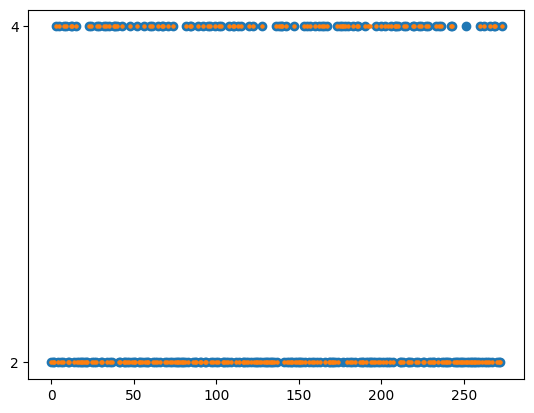

In [ ]:
# for Random Forest Classifier visualize how predicted values match the actual ones

clf = RandomForestClassifier()

train_X, val_X, train_y, val_y = train_test_split(X,y,train_size=0.6,  random_state=1)

clf.fit(train_X, train_y)

y_pred = clf.predict(val_X)

cm = confusion_matrix(val_y,y_pred)
print(cm)

fig, ax = plt.subplots()

ax.scatter(range(0,len(val_y)),val_y) # bigger blue dots
ax.scatter(range(0,len(y_pred)),y_pred, s=5) # smaller orange dots

ax.set(yticks = [2, 4])